In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
df =pd.read_csv("../data/bank_data_project.csv")

In [ ]:
df.info()

In [ ]:
df.head()

In [5]:
# Convert to datetime if needed
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], errors='coerce')
unique_dates = df["TransactionDate"].unique()
print(unique_dates)

<DatetimeArray>
['2016-02-08 00:00:00', '2016-01-08 00:00:00', '2016-03-08 00:00:00',
 '2016-05-08 00:00:00', '2016-04-08 00:00:00', '2016-06-08 00:00:00',
 '2016-09-08 00:00:00', '2016-08-08 00:00:00', '2016-12-08 00:00:00',
 '2016-07-08 00:00:00',                 'NaT', '2016-10-08 00:00:00',
 '2016-11-08 00:00:00', '2016-03-09 00:00:00', '2016-02-09 00:00:00',
 '2016-01-09 00:00:00', '2016-06-09 00:00:00', '2016-05-09 00:00:00',
 '2016-04-09 00:00:00', '2016-09-09 00:00:00', '2016-08-09 00:00:00',
 '2016-07-09 00:00:00', '2016-12-09 00:00:00', '2016-11-09 00:00:00',
 '2016-10-09 00:00:00']
Length: 25, dtype: datetime64[ns]


In [6]:
# Convert to datetime if needed
df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"], errors='coerce')
unique_dates = df["CustomerDOB"].unique()
print(unique_dates)

<DatetimeArray>
['1994-10-01 00:00:00', '1957-04-04 00:00:00',                 'NaT',
 '1972-08-10 00:00:00', '1988-07-07 00:00:00', '1992-05-01 00:00:00',
 '1968-10-07 00:00:00', '1800-01-01 00:00:00', '1991-11-01 00:00:00',
 '1986-01-10 00:00:00',
 ...
 '1998-04-02 00:00:00', '1959-09-03 00:00:00', '1998-02-06 00:00:00',
 '1957-08-05 00:00:00', '1965-10-02 00:00:00', '2004-07-03 00:00:00',
 '1945-07-06 00:00:00', '1954-09-06 00:00:00', '1946-06-04 00:00:00',
 '1950-07-01 00:00:00']
Length: 7062, dtype: datetime64[ns]


In [7]:
 #Check for invalid dates (NaT values)
invalid_dates = df[df["CustomerDOB"].isna()]
print(f"Number of invalid dates: {len(invalid_dates)}")
print("Invalid entries:")
print(invalid_dates)

Number of invalid dates: 560396
Invalid entries:
        TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
2                  T3   C4417068         NaT          F         MUMBAI   
3                  T4   C5342380         NaT          F         MUMBAI   
4                  T5   C9031234         NaT          F    NAVI MUMBAI   
6                  T7   C7126560         NaT          F         MUMBAI   
7                  T8   C1220223         NaT          M         MUMBAI   
...               ...        ...         ...        ...            ...   
1041607      T1048561   C5028150         NaT          M           PUNE   
1041608      T1048562   C1034220         NaT          M      BANGALORE   
1041610      T1048564   C6459278         NaT          M         NASHIK   
1041611      T1048565   C6412354         NaT          M      HYDERABAD   
1041612      T1048566   C6420483         NaT          M  VISAKHAPATNAM   

         CustAccountBalance TransactionDate  TransactionTime  

In [8]:
# Count NaT values
nat_count = df["CustomerDOB"].isna().sum()
total_count = len(df)
print(f"Invalid dates (NaT): {nat_count}")
print(f"Total rows: {total_count}")
print(f"Percentage invalid: {(nat_count/total_count)*100:.2f}%")

Invalid dates (NaT): 560396
Total rows: 1041614
Percentage invalid: 53.80%


In [9]:
# Check what the original date values actually look like
print("Sample of original CustomerDOB values that became NaT:")
original_dob_sample = df.loc[df["CustomerDOB"].isna(), "CustomerDOB"].head(20)
print(original_dob_sample.tolist())

# Or if you have the original data before conversion, check that

Sample of original CustomerDOB values that became NaT:
[NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT]


In [10]:
df["CustomerDOB"] = df["CustomerDOB"].bfill()

In [11]:
# Convert to datetime if needed
df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"], errors='coerce')
unique_dates = df["CustomerDOB"].unique()
print(unique_dates)

<DatetimeArray>
['1994-10-01 00:00:00', '1957-04-04 00:00:00', '1972-08-10 00:00:00',
 '1988-07-07 00:00:00', '1992-05-01 00:00:00', '1968-10-07 00:00:00',
 '1800-01-01 00:00:00', '1991-11-01 00:00:00', '1986-01-10 00:00:00',
 '1986-01-02 00:00:00',
 ...
 '1998-04-02 00:00:00', '1959-09-03 00:00:00', '1998-02-06 00:00:00',
 '1957-08-05 00:00:00', '1965-10-02 00:00:00', '2004-07-03 00:00:00',
 '1945-07-06 00:00:00', '1954-09-06 00:00:00', '1946-06-04 00:00:00',
 '1950-07-01 00:00:00']
Length: 7061, dtype: datetime64[ns]


In [12]:
# Convert to datetime 
print(df["CustomerDOB"])

0         1994-10-01
1         1957-04-04
2         1972-08-10
3         1972-08-10
4         1972-08-10
             ...    
1041609   1990-08-04
1041610   1984-05-03
1041611   1984-05-03
1041612   1984-05-03
1041613   1984-05-03
Name: CustomerDOB, Length: 1041614, dtype: datetime64[ns]


In [13]:
# Count NaT values
nat_count = df["CustomerDOB"].isna().sum()
total_count = len(df)
print(f"Invalid dates (NaT): {nat_count}")
print(f"Total rows: {total_count}")
print(f"Percentage invalid: {(nat_count/total_count)*100:.2f}%")

Invalid dates (NaT): 0
Total rows: 1041614
Percentage invalid: 0.00%


In [14]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1972-08-10,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,1972-08-10,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1972-08-10,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [15]:
df.describe()

,CustomerDOB,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1.041614e+06,538378,1.041614e+06,1.041614e+06
mean,1963-09-24 01:54:37.317700992,1.149986e+05,2016-06-24 11:52:07.540872448,1.571221e+05,1.566096e+03
min,1800-01-01 00:00:00,0.000000e+00,2016-01-08 00:00:00,0.000000e+00,0.000000e+00
25%,1977-10-02 00:00:00,4.728140e+03,2016-04-08 00:00:00,1.240410e+05,1.600000e+02
50%,1986-05-10 00:00:00,1.676852e+04,2016-07-08 00:00:00,1.642470e+05,4.575000e+02
75%,1990-11-02 00:00:00,5.742885e+04,2016-10-08 00:00:00,2.000220e+05,1.200000e+03
max,2029-06-05 00:00:00,1.150355e+08,2016-12-09 00:00:00,2.359590e+05,1.560035e+06
std,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03


In [16]:
print(df['CustomerDOB'])

0         1994-10-01
1         1957-04-04
2         1972-08-10
3         1972-08-10
4         1972-08-10
             ...    
1041609   1990-08-04
1041610   1984-05-03
1041611   1984-05-03
1041612   1984-05-03
1041613   1984-05-03
Name: CustomerDOB, Length: 1041614, dtype: datetime64[ns]


In [17]:
print(df["CustomerDOB"].head(30).tolist())

[Timestamp('1994-10-01 00:00:00'), Timestamp('1957-04-04 00:00:00'), Timestamp('1972-08-10 00:00:00'), Timestamp('1972-08-10 00:00:00'), Timestamp('1972-08-10 00:00:00'), Timestamp('1972-08-10 00:00:00'), Timestamp('1988-07-07 00:00:00'), Timestamp('1988-07-07 00:00:00'), Timestamp('1988-07-07 00:00:00'), Timestamp('1988-07-07 00:00:00'), Timestamp('1988-07-07 00:00:00'), Timestamp('1988-07-07 00:00:00'), Timestamp('1992-05-01 00:00:00'), Timestamp('1992-05-01 00:00:00'), Timestamp('1968-10-07 00:00:00'), Timestamp('1968-10-07 00:00:00'), Timestamp('1800-01-01 00:00:00'), Timestamp('1991-11-01 00:00:00'), Timestamp('1991-11-01 00:00:00'), Timestamp('1800-01-01 00:00:00'), Timestamp('1800-01-01 00:00:00'), Timestamp('1800-01-01 00:00:00'), Timestamp('1800-01-01 00:00:00'), Timestamp('1986-01-10 00:00:00'), Timestamp('1986-01-02 00:00:00'), Timestamp('1986-01-02 00:00:00'), Timestamp('1986-01-02 00:00:00'), Timestamp('1993-01-04 00:00:00'), Timestamp('1800-01-01 00:00:00'), Timestamp('18

In [18]:
df[df["CustomerDOB"].dt.year == 1800]


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
16,T17,C1376215,1800-01-01,M,MUMBAI,77495.15,2016-01-08,124727,1423.11
19,T20,C8999019,1800-01-01,M,PUNE,10643.50,2016-01-08,152821,945.00
20,T21,C6121429,1800-01-01,M,NO 3 KALYANI NAGAR PUNE,2934.22,2016-01-08,152824,36.00
21,T22,C4511244,1800-01-01,F,SECUNDERABAD,4470.15,2016-03-08,105329,27.00
22,T23,C7018081,1800-01-01,M,WAYS PANCHKUVA AHMEDABAD,143.07,2016-03-08,104718,110.00
...,...,...,...,...,...,...,...,...,...
1041578,T1048532,C6937679,1800-01-01,M,NEW DELHI,50698.90,NaT,184319,598.86
1041579,T1048533,C3422316,1800-01-01,F,BARODA,91662.32,NaT,183750,800.00
1041580,T1048534,C7431884,1800-01-01,M,MANDIR DHANBAD,53771.64,NaT,184049,520.00
1041586,T1048540,C7411577,1800-01-01,F,BANGALORE,10662.67,NaT,182350,695.00


In [19]:
df[df['CustomerDOB'].dt.year == 1800].shape


(121197, 9)

In [20]:
df.loc[df['CustomerDOB'].dt.year == 1800, 'CustomerDOB'] = pd.Timestamp('2020-01-01')


In [21]:
df['TransactionDate'].isnull().sum()

503236

In [22]:
df['CustomerDOB'].head(30)

0    1994-10-01
1    1957-04-04
2    1972-08-10
3    1972-08-10
4    1972-08-10
5    1972-08-10
6    1988-07-07
7    1988-07-07
8    1988-07-07
9    1988-07-07
10   1988-07-07
11   1988-07-07
12   1992-05-01
13   1992-05-01
14   1968-10-07
15   1968-10-07
16   2020-01-01
17   1991-11-01
18   1991-11-01
19   2020-01-01
20   2020-01-01
21   2020-01-01
22   2020-01-01
23   1986-01-10
24   1986-01-02
25   1986-01-02
26   1986-01-02
27   1993-01-04
28   2020-01-01
29   2020-01-01
Name: CustomerDOB, dtype: datetime64[ns]

In [23]:
df.describe()

,CustomerDOB,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1.041614e+06,538378,1.041614e+06,1.041614e+06
mean,1989-04-29 13:16:31.929064192,1.149986e+05,2016-06-24 11:52:07.540872448,1.571221e+05,1.566096e+03
min,1930-01-01 00:00:00,0.000000e+00,2016-01-08 00:00:00,0.000000e+00,0.000000e+00
25%,1982-12-04 00:00:00,4.728140e+03,2016-04-08 00:00:00,1.240410e+05,1.600000e+02
50%,1988-09-02 00:00:00,1.676852e+04,2016-07-08 00:00:00,1.642470e+05,4.575000e+02
75%,1992-09-10 00:00:00,5.742885e+04,2016-10-08 00:00:00,2.000220e+05,1.200000e+03
max,2029-06-05 00:00:00,1.150355e+08,2016-12-09 00:00:00,2.359590e+05,1.560035e+06
std,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03


In [24]:
#create a save my original data
data = df.copy()

In [25]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1972-08-10,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,1972-08-10,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1972-08-10,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [26]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1972-08-10,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,1972-08-10,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1972-08-10,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [27]:
# Encoding the Categorical columns
from sklearn.preprocessing import LabelEncoder

In [28]:
encoder = LabelEncoder()

In [29]:
data['CustGender'] = encoder.fit_transform(data['CustGender'])
data['CustLocation'] = encoder.fit_transform(data['CustLocation'])

In [30]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,0,3557,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,1957-04-04,1,3618,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1972-08-10,0,5219,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,1972-08-10,0,5219,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1972-08-10,0,5606,6714.43,2016-02-08,181156,1762.5


In [31]:
data['CustomerDOB'].unique

<bound method Series.unique of 0         1994-10-01
1         1957-04-04
2         1972-08-10
3         1972-08-10
4         1972-08-10
             ...    
1041609   1990-08-04
1041610   1984-05-03
1041611   1984-05-03
1041612   1984-05-03
1041613   1984-05-03
Name: CustomerDOB, Length: 1041614, dtype: datetime64[ns]>

In [32]:
data.isna().sum()

TransactionID                   0
CustomerID                      0
CustomerDOB                     0
CustGender                      0
CustLocation                    0
CustAccountBalance              0
TransactionDate            503236
TransactionTime                 0
TransactionAmount (INR)         0
dtype: int64

In [33]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  int32         
 4   CustLocation             1041614 non-null  int32         
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          538378 non-null   datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int32(2), int64(1), object(2)
memory usage: 63.6+ MB


In [34]:
missing_percent = (data['TransactionDate'].isna().sum() / len(data)) * 100
print(f"Missing TransactionDate: {missing_percent:.2f}%")


Missing TransactionDate: 48.31%


In [35]:


# Add flag for missing date
data['HasTransactionDate'] = data['TransactionDate'].notna().astype(int)

# Fill missing with mode (most frequent)
mode_date = data['TransactionDate'].mode()[0]
data['TransactionDate'] = data['TransactionDate'].fillna(mode_date)

# Check result
data.isna().sum()


TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
HasTransactionDate         0
dtype: int64

In [36]:
#check for duplicates
data.describe()

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),HasTransactionDate
count,1041614,1.041614e+06,1.041614e+06,1.041614e+06,1041614,1.041614e+06,1.041614e+06,1.041614e+06
mean,1989-04-29 13:16:31.929064192,7.305777e-01,4.085712e+03,1.149986e+05,2016-07-01 00:27:59.783873536,1.571221e+05,1.566096e+03,5.168690e-01
min,1930-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,2016-01-08 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1982-12-04 00:00:00,0.000000e+00,2.055000e+03,4.728140e+03,2016-06-09 00:00:00,1.240410e+05,1.600000e+02,0.000000e+00
50%,1988-09-02 00:00:00,1.000000e+00,4.086000e+03,1.676852e+04,2016-07-08 00:00:00,1.642470e+05,4.575000e+02,1.000000e+00
75%,1992-09-10 00:00:00,1.000000e+00,5.738000e+03,5.742885e+04,2016-07-08 00:00:00,2.000220e+05,1.200000e+03,1.000000e+00
max,2029-06-05 00:00:00,2.000000e+00,9.274000e+03,1.150355e+08,2016-12-09 00:00:00,2.359590e+05,1.560035e+06,1.000000e+00
std,NaN,4.436621e-01,2.363229e+03,8.467609e+05,NaN,5.126352e+04,6.561464e+03,4.997156e-01


In [37]:
data.loc[data['CustomerDOB'] > '2025-01-01', 'CustomerDOB'] = pd.NaT


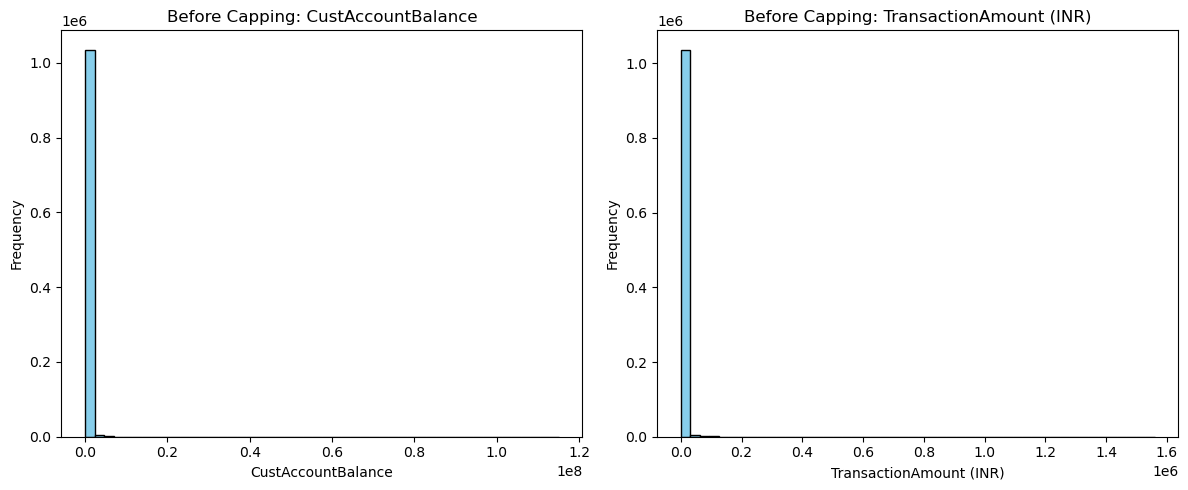

In [38]:


cols = ['CustAccountBalance', 'TransactionAmount (INR)']

plt.figure(figsize=(12,5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 2, i)
    plt.hist(data[col], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Before Capping: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


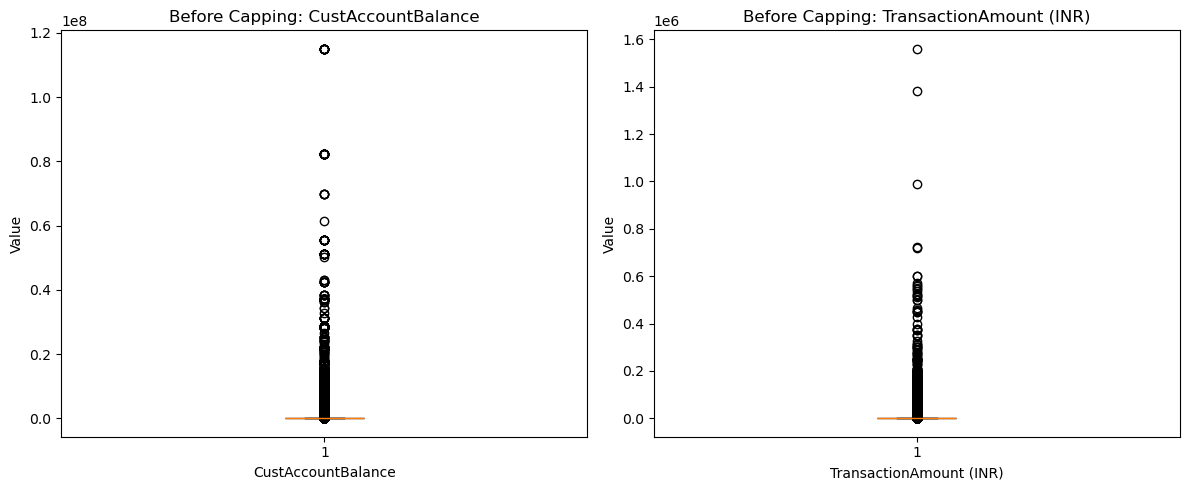

In [39]:



cols = ['CustAccountBalance', 'TransactionAmount (INR)']

# Create subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(12,5))

for i, col in enumerate(cols):
    ax[i].boxplot(data[col], patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
    ax[i].set_title(f'Before Capping: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Value')

plt.tight_layout()
plt.show()



In [40]:


# Columns to check
cols = ['CustAccountBalance', 'TransactionAmount (INR)']

for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = ((data[col] < lower) | (data[col] > upper)).sum()
    print(f"{col}: {outliers} outliers detected")


CustAccountBalance: 140263 outliers detected
TransactionAmount (INR): 110614 outliers detected


In [41]:


cols = ['CustAccountBalance', 'TransactionAmount (INR)']

for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap values instead of removing
    data[col] = np.where(data[col] < lower, lower, data[col])
    data[col] = np.where(data[col] > upper, upper, data[col])

print("✅ Outliers capped successfully.")


✅ Outliers capped successfully.


In [42]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),HasTransactionDate
0,T1,C5841053,1994-10-01,0,3557,17819.050,2016-02-08,143207,25.0,1
1,T2,C2142763,1957-04-04,1,3618,2270.690,2016-02-08,141858,2760.0,1
2,T3,C4417068,1972-08-10,0,5219,17874.440,2016-02-08,142712,459.0,1
3,T4,C5342380,1972-08-10,0,5219,136479.915,2016-02-08,142714,2060.0,1
4,T5,C9031234,1972-08-10,0,5606,6714.430,2016-02-08,181156,1762.5,1


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041479 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  int32         
 4   CustLocation             1041614 non-null  int32         
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
 9   HasTransactionDate       1041614 non-null  int32         
dtypes: datetime64[ns](2), float64(2), int32(3), int64(1), object(2)
memory usage: 67.5+ MB


In [44]:


# Convert columns to datetime
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'], errors='coerce')
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], errors='coerce')
data['TransactionTime'] = pd.to_datetime(data['TransactionTime'], errors='coerce')


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          538378 non-null   datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 71.5+ MB


In [46]:
data[['CustomerDOB', 'TransactionDate', 'TransactionTime']].head(30)


,CustomerDOB,TransactionDate,TransactionTime
0,1994-10-01,2016-02-08,1970-01-01 00:00:00.000143207
1,1957-04-04,2016-02-08,1970-01-01 00:00:00.000141858
2,1972-08-10,2016-02-08,1970-01-01 00:00:00.000142712
3,1972-08-10,2016-02-08,1970-01-01 00:00:00.000142714
4,1972-08-10,2016-02-08,1970-01-01 00:00:00.000181156
5,1972-08-10,2016-02-08,1970-01-01 00:00:00.000173940
6,1988-07-07,2016-02-08,1970-01-01 00:00:00.000173806
7,1988-07-07,2016-02-08,1970-01-01 00:00:00.000170537
8,1988-07-07,2016-02-08,1970-01-01 00:00:00.000192825
9,1988-07-07,2016-02-08,1970-01-01 00:00:00.000192446


In [47]:
data['TransactionDate'].astype(str).str[:10].unique()[:10]


array(['2016-02-08', '2016-01-08', '2016-03-08', '2016-05-08',
       '2016-04-08', '2016-06-08', '2016-09-08', '2016-08-08',
       '2016-12-08', '2016-07-08'], dtype=object)

In [48]:
data['CustomerDOB'].astype(str).str[:10].unique()[:10]

array(['1994-10-01', '1957-04-04', '1972-08-10', '1988-07-07',
       '1992-05-01', '1968-10-07', '2020-01-01', '1991-11-01',
       '1986-01-10', '1986-01-02'], dtype=object)

In [49]:
#  Clean column names ---
df.rename(columns={
    'TransactionAmount (INR)': 'TransactionAmount'
}, inplace=True)

In [50]:
# Convert TransactionDate to datetime ---
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

In [51]:
#  Compute snapshot date (day after latest transaction) ---
snapshot_date = df['TransactionDate'].max() + pd.Timedelta(days=1)

In [52]:
#  Group by CustomerID to calculate RFM ---
rfm = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (snapshot_date - x.max()).days,
    'TransactionID': 'count',
    'TransactionAmount': 'sum'
}).reset_index()


In [53]:
#  Rename columns ---
rfm.columns = ['CustomerID', 'recency_days', 'frequency', 'monetary']


In [54]:
#  F, M scores using quantiles ---
rfm['R_score'] = pd.qcut(rfm['recency_days'], 5, labels=[5,4,3,2,1])
rfm['F_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_score'] = pd.qcut(rfm['monetary'], 5, labels=[1,2,3,4,5])


In [55]:
#  Combine into single RFM score ---
rfm['RFM_Score'] = (
    rfm['R_score'].astype(str) + 
    rfm['F_score'].astype(str) + 
    rfm['M_score'].astype(str)
)

Champions
Use banking services frequently, recently, and maintain high balances.
Action: Offer VIP or priority banking, exclusive investment advice, or fee discounts.

Loyal Customers
Consistent users of bank products such as salary accounts and bill payments.
Action: Cross-sell credit cards, savings plans, or insurance; reward their loyalty.

Potential Loyalists
New clients showing early engagement or frequent initial activity.
Action: Welcome them with bonuses, savings challenges, or educational offers.

At Risk
Previously active customers who have reduced or stopped activity recently.
Action: Send reactivation messages, review offers, or loyalty reminders.

Lost
Inactive for a long time or have closed accounts.
Action: Use win-back promotions, feedback surveys, or reactivation fee waivers.

The RFM segmentation model helps the bank understand customer behavior based on how recently and frequently they use banking services and the monetary value they bring. Champions are the bank’s most valuable clients who transact frequently, maintain high balances, and engage with multiple products; they should be rewarded with VIP treatment, lower fees, and exclusive financial offers. Loyal Customers consistently use banking services such as salary deposits, bill payments, or credit card usage and should be encouraged to explore additional products through cross-selling and loyalty incentives. Potential Loyalists are new but promising clients showing early engagement, who can be nurtured with welcome offers, education on available services, and savings programs. At Risk customers were previously active but have recently reduced their activity; they require reactivation campaigns, personalized outreach, or financial review sessions to regain their interest. Finally, Lost customers have been inactive for a long period or closed their accounts, and the bank can attempt to win them back through feedback surveys, promotional offers, or account reopening incentives. This segmentation enables the bank to design targeted marketing and retention strategies for each customer group.


In [56]:
import re

# Define segmentation logic
def segment_me(df):
    if re.match(r'[5][4-5][4-5]', df['RFM_Score']):
        return 'Champions'
    elif re.match(r'[4][3-5][3-5]', df['RFM_Score']):
        return 'Loyal Customers'
    elif re.match(r'[3][3-5][1-3]', df['RFM_Score']):
        return 'Potential Loyalist'
    elif re.match(r'[2][2-3][2-3]', df['RFM_Score']):
        return 'At Risk'
    elif re.match(r'[1][1-2][1-2]', df['RFM_Score']):
        return 'Lost'
    else:
        return 'Others'

# Apply segmentation
rfm['Segment'] = rfm.apply(segment_me, axis=1)


In [57]:
segment_summary = rfm.groupby('Segment').agg({
    'recency_days': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
}).round(1)

print("✅ RFM Segmentation Summary:")
print(segment_summary)


✅ RFM Segmentation Summary:
                   recency_days frequency monetary        
                           mean      mean     mean   count
Segment                                                   
At Risk                   241.1       1.0    399.5   16200
Champions                  27.3       1.9   4453.3   29992
Lost                      312.6       1.0    154.5   16758
Loyal Customers            98.2       1.6   3299.0   43130
Others                    171.2       1.1   1794.2  745430
Potential Loyalist        169.3       1.2    321.1   27848


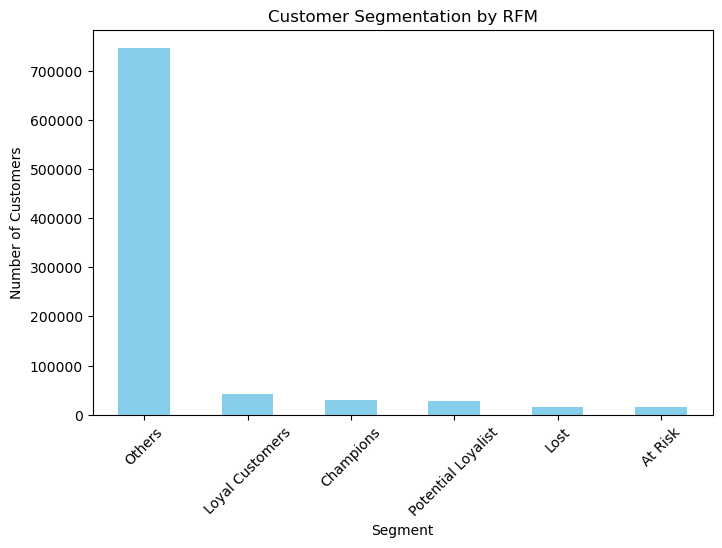

In [58]:


rfm['Segment'].value_counts().plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title('Customer Segmentation by RFM')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


In [59]:
rfm.to_excel('RFM_Segmentation_Results.xlsx', index=False)
print("✅ File saved: RFM_Segmentation_Results")


✅ File saved: RFM_Segmentation_Results


In [60]:
print(df.shape)
df.head(3)

(1041614, 9)


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1972-08-10,F,MUMBAI,17874.44,2016-02-08,142712,459.0
